In [18]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('4_new_features1.csv')

In [29]:
df.head()

,Unnamed: 0,Unnamed: 0.1,item name,Время чтения,Сложность,Количество просмотров,В закладках,Комментарии,Автор,Рейтинг автора,Время публикации,Savings_per_Views,norm_ReadingTime,hour
0,0,0,Мультяшная графика продаётся лучше реалистично...,8,2,324.0,1,1,@Kallist,0.0,2023-05-13 19:20:00,0.003086,0.084337,19
1,1,1,Picture in Picture Mode в android. Показываем ...,5,1,122.0,3,0,@cookie2727,0.0,2023-05-13 18:55:00,0.024590,0.048193,18
2,2,2,"Много нас, а GPU один. Как делиться?",6,1,1600.0,5,6,@Antra,6.1,2023-05-13 17:57:00,0.003125,0.060241,17
3,3,3,Ближайшие бесплатные мероприятия по разработке...,2,1,376.0,1,0,@ITMeeting,-0.8,2023-05-13 16:27:00,0.002660,0.012048,16
4,4,4,Одноплатник Orange Pi 5 Plus: характеристики и...,4,",",3500.0,6,13,@Seleditor,49.0,2023-05-13 12:55:00,0.001714,0.036145,12


### Проверка гипотез.1

Мы хотим узнать, есть ли разница в ожидаемом количестве сохранений у постов в зависимости от сложности. Визуализация наводила на мысль, что 1 и 2 сложность не отличаются по количеству сохранений. Поэтому мы сравним сначала их, а потом проведем сравнение с 3 сложностью.

In [30]:
easy = df.loc[(df['Сложность'] == '1')]['В закладках'].values
medium = df.loc[(df['Сложность'] == '2')]['В закладках'].values
hard = df.loc[(df['Сложность'] == '3')]['В закладках'].values

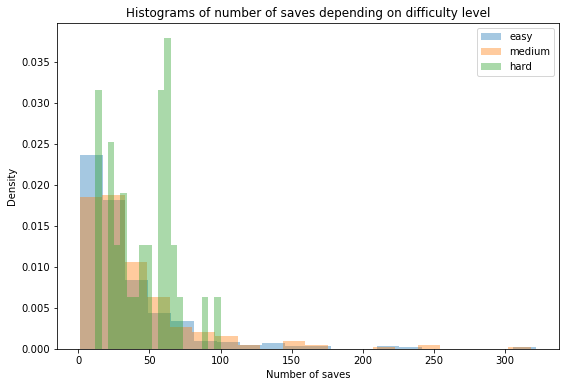

In [50]:
plt.figure(figsize=(9,6))
plt.hist(easy, bins=20, density=True, alpha=0.4, label='easy')
plt.hist(medium, bins=20, density=True, alpha=0.4, label='medium')
plt.hist(hard, bins=20, density=True, alpha=0.4, label='hard')
plt.xlabel('Number of saves')
plt.ylabel('Density')
plt.title('Histograms of number of saves depending on difficulty level')
plt.legend();

In [32]:
print(np.mean(easy), np.median(easy))
print(np.mean(medium), np.median(medium))
print(np.mean(hard), np.median(hard))

33.851351351351354 23.0
38.457142857142856 26.0
45.47222222222222 47.5


In [38]:
hard.shape[0]

36

Судя по графику и выборочным средним, 3 сложность обособлена от других двух и имеет в среднем больше сохранений, хотя на это влияет и число наблюдений в выборках. А вот статистическую значимость разницы между матожиданиями 1 и 2 сложности хотелось бы проверить.

Нулевая гипотеза: МО_сл1 = МО_сл2 <br /> Альтернативная гипотеза: МО_сл1 > МО_сл2

По гистограммам видно, что выборки не похожи на нормальные. Нам нужна статистика, которая бы подошла для проверки гипотезы о матожиданиях для выборок не из нормального распределения.

Выполняются предпосылки: независимость выборок, большое число наблюдений. Однако есть выбросы. Поэтому воспользуемся бутстрапом. <br /> *(Нас также интересовала доля этих выбросов, чтобы ответить на вопрос о том, посты какой сложности имеют больший потенциал "выстрелить". Но это уже совсем другая гипотеза)*

In [40]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

In [42]:
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

In [41]:
x_boot = get_bootstrap_sample(easy, B_sample=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(medium, B_sample=10**4)
y_boot = np.median(y_boot, axis=0)

In [43]:
stat_intervals(x_boot)

(21.0, 25.0)

In [44]:
stat_intervals(y_boot)

(22.0, 30.0)

In [45]:
stat_intervals(x_boot - y_boot)

(-7.5, 1.0)

In [49]:
np.mean(x_boot - y_boot > 0) # вероятность, что разница будет больше 0

0.0485

Получается, на уровне значимости 5% нет разницы между матожиданием числа сохранений постов 1 сложности и постов 2 сложности

### Проверка гипотез.2

In [ ]:
longread = df.loc[(df['Время чтения'] > )]['В закладках'].values